# Sentiment Analysis with NLP

This notebook performs sentiment analysis on social media texts using Natural Language Processing (NLP) techniques. 

We'll:
- Load and clean a sentiment-labeled dataset
- Preprocess the text (tokenization, lemmatization, etc.)
- Train a classifier
- Evaluate performance
- Export predictions


In [1]:
# sentiment_analysis_notebook.ipynb

# Imports
import sys
import os

# Add project root to path
sys.path.append(os.path.abspath(".."))  # Adjust depending on your directory depth

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from Level3_Advanced.Task2_NLP.sentiment_classification import (
    load_dataset,
    simplify_labels,
    preprocess,
    clean_dataframe,
    train_model,
    save_model_and_vectorizer,
    load_model_and_vectorizer
)

# Paths
RAW_DATA_PATH = "../data/raw/sentiment_dataset.csv"
CLEANED_DATA_PATH = "../../data/cleaned/sentiment_dataset_cleaned.csv"
MODEL_PATH = "../../models/sentiment_model.pkl"
VECTORIZER_PATH = "../../models/tfidf_vectorizer.pkl"


[nltk_data] Downloading package stopwords to C:\Users\Kabelo
[nltk_data]     Matlakala\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Kabelo
[nltk_data]     Matlakala\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Kabelo
[nltk_data]     Matlakala\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Load or Clean Dataset

check if the cleaned dataset already exists. 
- If it does, we load it; 
- otherwise, we process the raw data, clean it, and save it for future use.

We normalize sentiment labels (e.g., "Positive", "positive") and apply preprocessing to clean the text:
- Lowercasing
- Removing punctuation
- Stopword removal
- Lemmatization


In [ ]:
import os
import pandas as pd

if os.path.exists(CLEANED_DATA_PATH):
    print("Loading existing cleaned dataset...")
    df_cleaned = pd.read_csv(CLEANED_DATA_PATH)
else:
    print("Cleaned dataset not found. Processing raw data...")
    df_raw = load_dataset(RAW_DATA_PATH)
    df_cleaned = simplify_labels(df_raw)
    df_cleaned['clean_text'] = df_cleaned['Text'].astype(str).apply(preprocess)

    # Save cleaned dataset for reuse
    os.makedirs(os.path.dirname(CLEANED_DATA_PATH), exist_ok=True)
    df_cleaned.to_csv(CLEANED_DATA_PATH, index=False)
    print(f"Cleaned dataset saved to {CLEANED_DATA_PATH}")

print("Cleaned and preprocessed dataset ready.")


Cleaned and preprocessed dataset ready.


## Preview Cleaned Dataset
We display the first few rows of the cleaned dataset to ensure that preprocessing was applied correctly.

In [3]:
# Preview cleaned data
df_cleaned.head()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Sentiment_Mapped,clean_text
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,positive,enjoying beautiful day park
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,positive,finished amazing workout 💪
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,positive,excited upcoming weekend getaway
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,neutral,trying new recipe dinner tonight
5,Feeling grateful for the little things in lif...,Positive,2023-01-16 09:10:00,GratitudeNow,Twitter,#Gratitude #PositiveVibes,25.0,50.0,India,2023,1,16,9,positive,feeling grateful little thing life


#  Model Training and Evaluation

Now that the data is preprocessed, we:

- Use a sample of 300 rows to train the model
- Generate a classification report
- Evaluate model performance (accuracy, F1-score)
- Plot the confusion matrix


In [4]:
# Training options
use_full_data = True  # Set True to train on full dataset, False to use smaller sample

if use_full_data:
    print("Training on FULL dataset...")
    df_train = df_cleaned
else:
    sample_size = 300
    df_train = df_cleaned.sample(n=sample_size, random_state=42).reset_index(drop=True)
    print(f"Training on SAMPLE dataset of size {sample_size}...")

# Train model
model, vectorizer, X_test, y_test, y_pred = train_model(df_train)

# Save the model and vectorizer
save_model_and_vectorizer(model, vectorizer, os.path.dirname(MODEL_PATH))
print(f"Model and vectorizer saved at {os.path.dirname(MODEL_PATH)}")


Training on FULL dataset...
Model and vectorizer saved at ../../models


e:\CODveda\codveda-internship\codveda-env\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


## Model Evaluation Metrics
classification report, accuracy, and F1 score to assess performance.

In [5]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy & F1
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")


Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.88      0.93        16
     neutral       0.80      0.31      0.44        13
    positive       0.81      0.98      0.89        49

    accuracy                           0.85        78
   macro avg       0.87      0.72      0.76        78
weighted avg       0.85      0.85      0.82        78

Accuracy: 0.85
F1 Score: 0.82


##  Confusion Matrix

heatmap shows how well the model predicted sentiment classes.


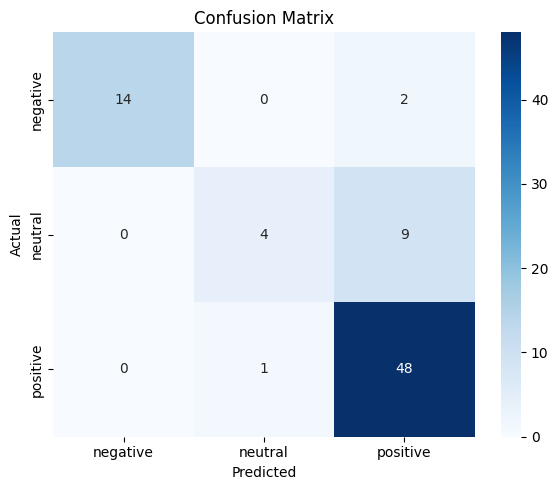

In [6]:
labels = ['negative', 'neutral', 'positive']
cm = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

## ✏️ Try It: Custom Sentiment Predictions

Let's try a few custom texts to see how well the model performs.


In [7]:
# Predict on custom inputs
texts = [
    "Can't believe the injustice happening in our society.",
    "Feeling a bit under the weather today.",
    "I'm not sure what to feel about this",
    "Such a bitter outcome, I can't believe it."
]

# Preprocess and predict
processed = [preprocess(t) for t in texts]
X_new = vectorizer.transform(processed)
predictions = model.predict(X_new)

# Result DataFrame
results_df = pd.DataFrame({"Text": texts, "Predicted Sentiment": predictions})
results_df


,Text,Predicted Sentiment
0,Can't believe the injustice happening in our s...,negative
1,Feeling a bit under the weather today.,positive
2,I'm not sure what to feel about this,positive
3,"Such a bitter outcome, I can't believe it.",negative


In [8]:
# Save to CSV
# results_df.to_csv("predictions_output.csv", index=False)
# print(" Predictions exported to predictions_output.csv")


# Summary

- **Dataset loaded and cleaned:** We loaded the raw sentiment dataset, normalized sentiment labels, and preprocessed the text data.
- **Model trained:** A logistic regression model was trained on a sample of the cleaned data using TF-IDF vectorization.
- **Performance evaluated:** We evaluated the model using classification report, accuracy, and weighted F1-score, and visualized the confusion matrix.
- **Predictions made:** The model was tested on custom example sentences to predict sentiment.
- **Download enabled:** Users can download prediction results as a CSV file directly from the notebook.
- **Next steps:** Consider training on a larger dataset, tuning hyperparameters, or experimenting with other models for improved performance.

---

